In [1]:

!pip install wikipedia

In [2]:
# %load ../../load_magic/storage1.py

current_directory = !echo %cd%
folder_list = current_directory[0].split('\\')
%run ../../load_magic/storage2.py {len(folder_list) - folder_list.index('ipynb')}
%who

data_folder = ../data/
saves_folder = ../saves/
attempt_to_pickle	 current_directory	 data_folder	 encoding	 folder_list	 load_csv	 load_dataframes	 load_object	 os	 
pd	 pickle	 save_dataframes	 saves_folder	 store_objects	 sys	 


In [3]:

import numpy as np

# Convert [-500, 0, 500, 1000, 1500, 2000] into [-500, 1750, ... 2000]
nominal_list = [-500, 0, 500, 1000, 1500, 2000]
xtick_list = [int(round(elem)) for elem in pd.cut(np.array([1750, 2000]), 4, retbins=True)[1]]
xtick_list = [-500] + xtick_list
def recalculate_born_year(born_year):
    if born_year < nominal_list[1]:
        pass
    elif born_year < xtick_list[1]:
        born_year = born_year - (xtick_list[1] - nominal_list[1])
    elif born_year < xtick_list[2]:
        born_year = born_year - (xtick_list[2] - nominal_list[2])
    elif born_year < xtick_list[3]:
        born_year = born_year - (xtick_list[3] - nominal_list[3])
    elif born_year < xtick_list[4]:
        born_year = born_year - (xtick_list[4] - nominal_list[4])
    
    return born_year

In [4]:
from bs4 import BeautifulSoup as bs
import networkx as nx
import wikipedia
import re
from random import shuffle

jung_digraph = nx.DiGraph()
jung_title = 'Carl Jung'
node_list = [jung_title]
jung_digraph.add_node(jung_title)
jung_page = wikipedia.page(jung_title)
born_regex = re.compile(r'(\d{3,4}( BC)?)')
bc_regex = re.compile(r'(\d+) BC')
pos_dict = {}
y_supply = list(range(100))
shuffle(y_supply)

In [5]:

def y():
    
    return (y_supply.pop())

In [6]:

def spider_infoboxes(jung_digraph, jung_page, updown='both'):
    jung_soup = bs(jung_page.html(), 'lxml')
    jung_title = jung_page.title
    for param_th in jung_soup.find_all('th', scope='row'):
        if (param_th.text.strip()=='Baptised') or (param_th.text.strip()=='Born'):
            born_td = param_th.find_next_sibling('td')
            born_list = born_regex.findall(born_td.text)
            if len(born_list) > 0:
                born_x = max(born_list, key=lambda x: len(x[0]))[0]
                born_x = int(bc_regex.sub(r'-\1', born_x))
                born_x = recalculate_born_year(born_x)
                born_pos = np.array((born_x, y()))
                born_pos = born_pos.astype(np.float32)
                pos_dict[jung_title] = born_pos
        if (param_th.text.strip()=='Influences') and ((updown=='both') or (updown=='up')):
            influences_td = param_th.find_next_sibling('td')
            for influences_link in influences_td.find_all('a', title=True):
                influences_title = influences_link['title']
                if influences_title not in node_list:
                    jung_digraph.add_node(influences_title)
                jung_digraph.add_edge(influences_title, jung_title)
                if influences_title not in node_list:
                    influences_page = wikipedia.page(influences_title)
                    jung_digraph = spider_infoboxes(jung_digraph, influences_page, updown='up')
                    node_list.append(influences_title)
        if (param_th.text.strip()=='Influenced') and ((updown=='both') or (updown=='down')):
            influenced_td = param_th.find_next_sibling('td')
            for influenced_link in influenced_td.find_all('a', title=True):
                influenced_title = influenced_link['title']
                if influenced_title not in node_list:
                    jung_digraph.add_node(influenced_title)
                jung_digraph.add_edge(jung_title, influenced_title)
                if influenced_title not in node_list:
                    influenced_page = wikipedia.page(influenced_title)
                    jung_digraph = spider_infoboxes(jung_digraph, influenced_page, updown='down')
                    node_list.append(influenced_title)
    
    return jung_digraph

In [7]:

jung_digraph = spider_infoboxes(jung_digraph, jung_page)
store_objects(jung_digraph=jung_digraph)

In [12]:

# Missing and misspelled
#pos_dict['August Forel'] = np.array((pos_dict.pop('Auguste Forel')[0], y())).astype(np.float32)
#pos_dict['Jean Martin Charcot'] = np.array((pos_dict.pop('Jean-Martin Charcot')[0], y())).astype(np.float32)
#pos_dict['F. W. J. Schelling'] = np.array((pos_dict.pop('Friedrich Wilhelm Joseph Schelling')[0], y())).astype(np.float32)
pos_dict['Thomas Malthus'] = np.array((recalculate_born_year(1766), y())).astype(np.float32)
pos_dict['Eduard von Hartmann'] = np.array((pos_dict.pop('Karl Robert Eduard von Hartmann')[0], y())).astype(np.float32)
store_objects(pos_dict=pos_dict)

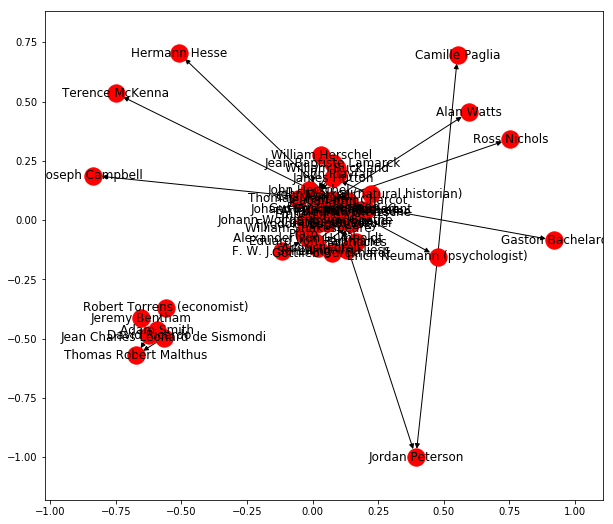

In [13]:

import matplotlib.pyplot as plt
%matplotlib inline

# Draw the graph using the default spring layout
plt.figure(figsize=(10,9))
nx.draw_networkx(jung_digraph)

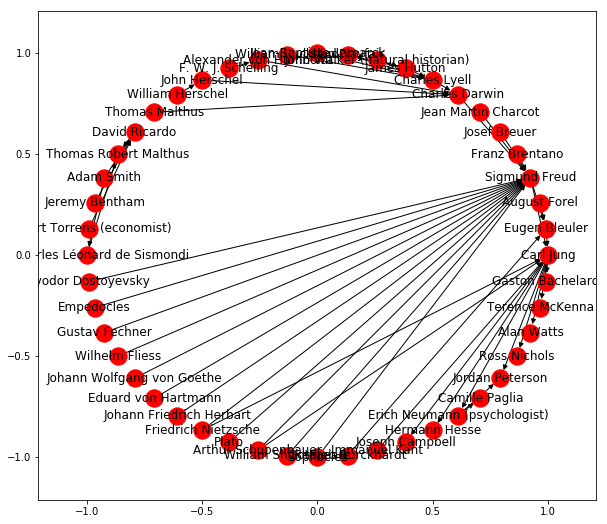

In [14]:

# Draw the graph using the circular layout
plt.figure(figsize=(10,9))
pos = nx.circular_layout(jung_digraph)
nx.draw_networkx(jung_digraph, pos)

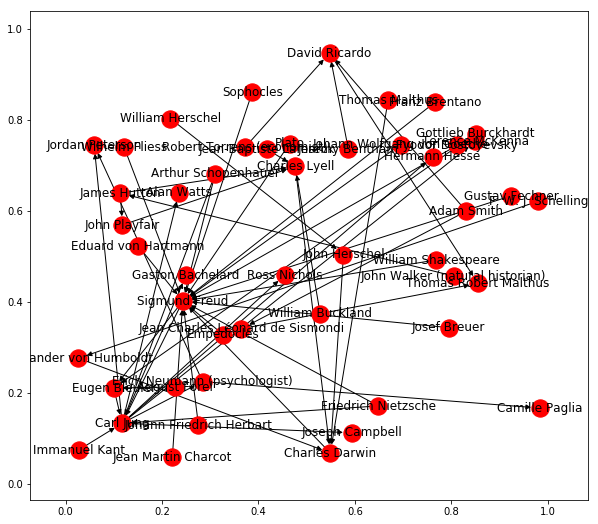

In [15]:

# Draw the graph using the random layout
plt.figure(figsize=(10,9))
pos = nx.random_layout(jung_digraph)
nx.draw_networkx(jung_digraph, pos)

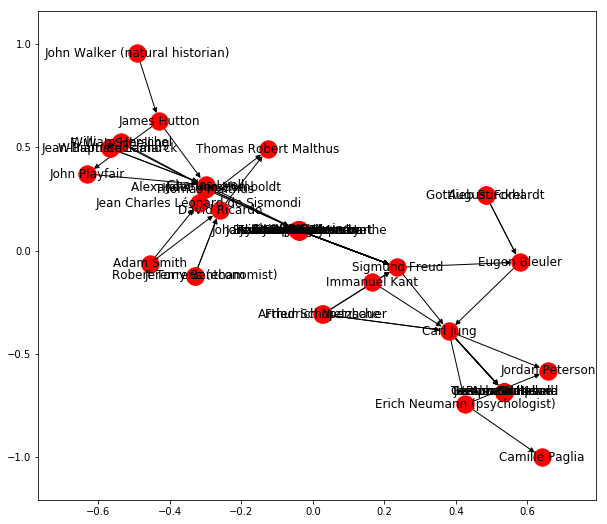

In [16]:

# Draw the graph using the kamada kawai layout
plt.figure(figsize=(10,9))
pos = nx.kamada_kawai_layout(jung_digraph)
nx.draw_networkx(jung_digraph, pos)

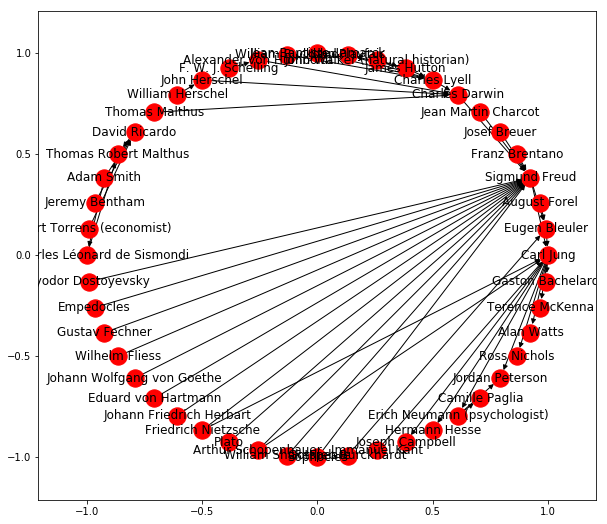

In [17]:

# Draw the graph using the shell layout
plt.figure(figsize=(10,9))
pos = nx.shell_layout(jung_digraph)
nx.draw_networkx(jung_digraph, pos)

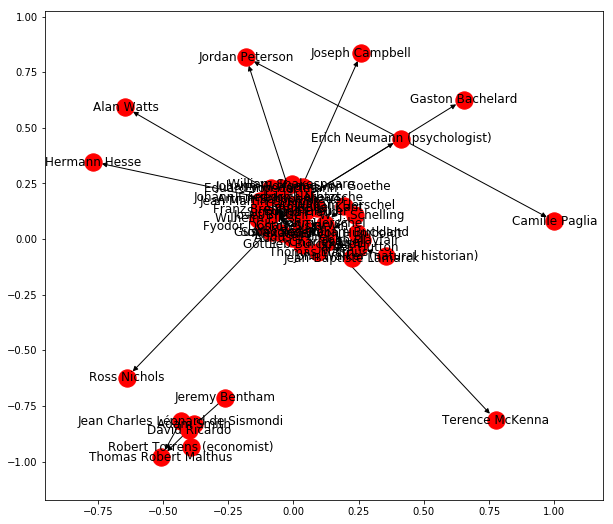

In [18]:

# Draw the graph using the spring layout
plt.figure(figsize=(10,9))
pos = nx.spring_layout(jung_digraph)
nx.draw_networkx(jung_digraph, pos)

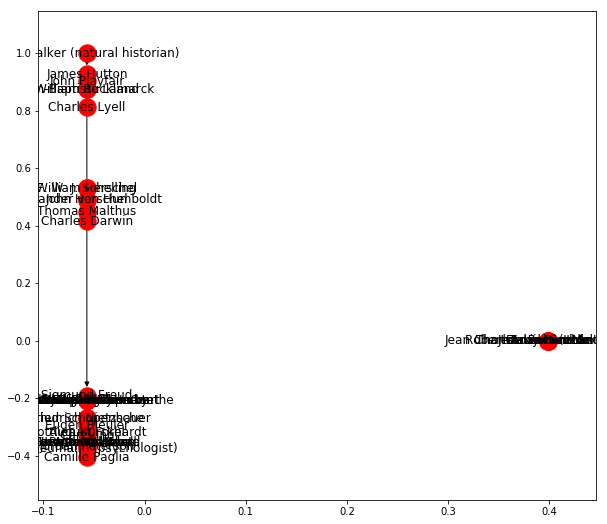

In [19]:

# Draw the graph using the spectral layout
plt.figure(figsize=(10,9))
pos = nx.spectral_layout(jung_digraph)
nx.draw_networkx(jung_digraph, pos)

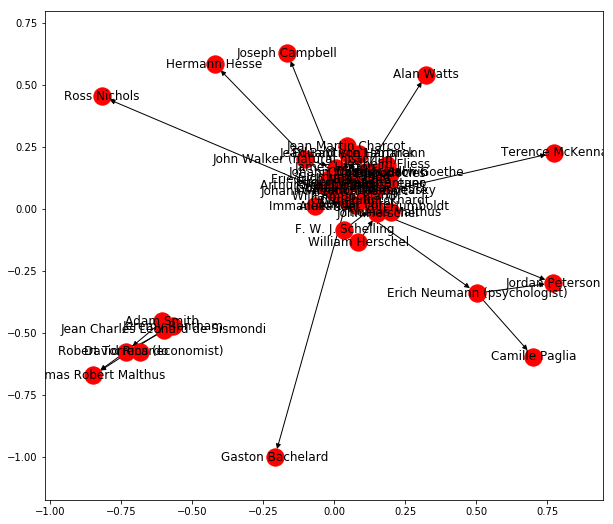

In [20]:

# Draw the graph using the fruchterman reingold layout
plt.figure(figsize=(10,9))
pos = nx.fruchterman_reingold_layout(jung_digraph)
nx.draw_networkx(jung_digraph, pos)

In [21]:

pos_dict = load_object('pos_dict')
kamada_kawai_pos = nx.kamada_kawai_layout(jung_digraph)
for node in pos_dict:
    pos_dict[node] = np.array((pos_dict[node][0], kamada_kawai_pos[node][1])).astype(np.float32)
store_objects(pos_dict=pos_dict)

In [57]:

cut_array = pd.cut(np.array([-1.5, 1.5]), 4, retbins=True)[1]
pos_dict['Sophocles'] = np.array((pos_dict['Sophocles'][0], cut_array[1])).astype(np.float32)
pos_dict['Empedocles'] = np.array((pos_dict['Empedocles'][0], cut_array[2])).astype(np.float32)
pos_dict['Plato'] = np.array((pos_dict['Plato'][0], cut_array[3])).astype(np.float32)
store_objects(pos_dict=pos_dict)

In [59]:

cut_array = pd.cut(np.array([-1.5, 1.5]), 11, retbins=True)[1]
pos_dict['William Shakespeare'] = np.array((pos_dict['William Shakespeare'][0], cut_array[1])).astype(np.float32)
pos_dict['Adam Smith'] = np.array((pos_dict['Adam Smith'][0], cut_array[2])).astype(np.float32)
pos_dict['Immanuel Kant'] = np.array((pos_dict['Immanuel Kant'][0], cut_array[3])).astype(np.float32)
pos_dict['James Hutton'] = np.array((pos_dict['James Hutton'][0], cut_array[4])).astype(np.float32)
pos_dict['John Walker (natural historian)'] = np.array((pos_dict['John Walker (natural historian)'][0],
                                                        cut_array[5])).astype(np.float32)
pos_dict['William Herschel'] = np.array((pos_dict['William Herschel'][0], cut_array[6])).astype(np.float32)
pos_dict['Jean-Baptiste Lamarck'] = np.array((pos_dict['Jean-Baptiste Lamarck'][0], cut_array[7])).astype(np.float32)
pos_dict['John Playfair'] = np.array((pos_dict['John Playfair'][0], cut_array[8])).astype(np.float32)
pos_dict['Jeremy Bentham'] = np.array((pos_dict['Jeremy Bentham'][0], cut_array[9])).astype(np.float32)
pos_dict['Johann Wolfgang von Goethe'] = np.array((pos_dict['Johann Wolfgang von Goethe'][0], cut_array[10])).astype(np.float32)
store_objects(pos_dict=pos_dict)

['Thomas Robert Malthus', 'Thomas Malthus', 'Alexander von Humboldt', 'David Ricardo', 'Jean Charles Léonard de Sismondi', 'F. W. J. Schelling', 'Johann Friedrich Herbart', 'Robert Torrens (economist)', 'William Buckland', 'Arthur Schopenhauer', 'John Herschel', 'Charles Lyell', 'Gustav Fechner', 'Charles Darwin']


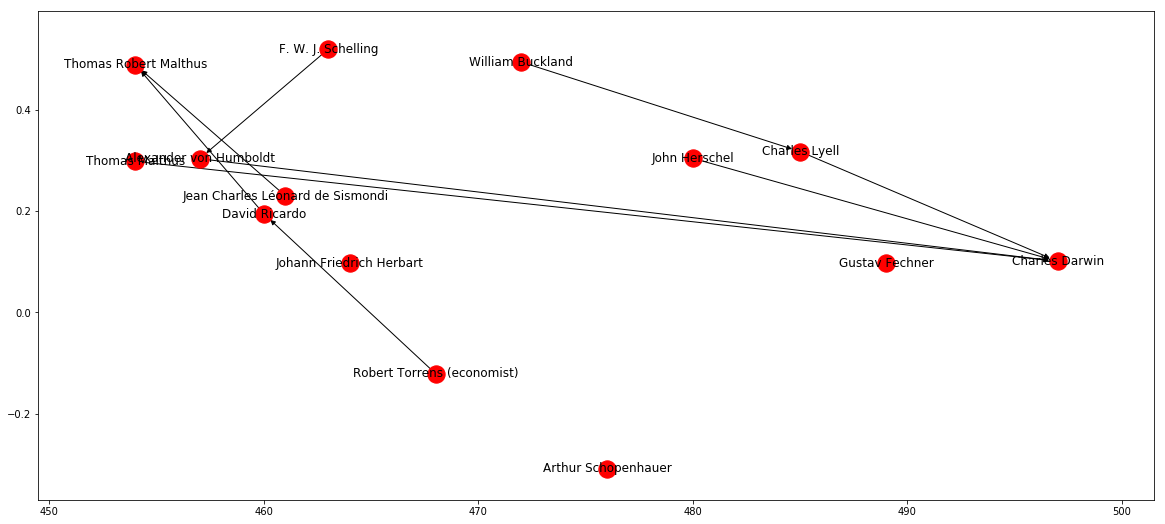

In [74]:

import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

# Let's look at dudes based on their birth range
tuple_list = sorted(pos_dict.items(), key=lambda x: x[1][0])[13:27]
jung_digraph = load_object('jung_digraph')
node_list = [node[0] for node in tuple_list]
jung_subgraph = jung_digraph.subgraph(node_list)
subgraph_fig = plt.figure(figsize=(20, 9))
subgraph_ax = subgraph_fig.add_subplot(111)
nx.draw_networkx(G=jung_subgraph, pos=pos_dict)
print(str(node_list))

In [76]:

cut_array = pd.cut(np.array([-1.5, 1.5]), len(node_list)+1, retbins=True)[1]
for i, node in enumerate(node_list):
    pos_dict[node] = np.array((pos_dict[node][0], cut_array[i+1])).astype(np.float32)
store_objects(pos_dict=pos_dict)

['Thomas Robert Malthus', 'Thomas Malthus', 'Alexander von Humboldt', 'David Ricardo', 'Jean Charles Léonard de Sismondi', 'F. W. J. Schelling', 'Johann Friedrich Herbart', 'Robert Torrens (economist)', 'William Buckland', 'Arthur Schopenhauer', 'John Herschel', 'Charles Lyell', 'Gustav Fechner', 'Charles Darwin']


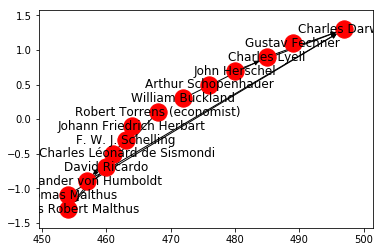

In [77]:

nx.draw_networkx(G=jung_subgraph, pos=pos_dict)
print(str(node_list))

['Fyodor Dostoyevsky', 'Jean Martin Charcot', 'Gottlieb Burckhardt', 'Franz Brentano', 'Josef Breuer', 'Eduard von Hartmann', 'Friedrich Nietzsche', 'August Forel', 'Sigmund Freud', 'Eugen Bleuler', 'Wilhelm Fliess']


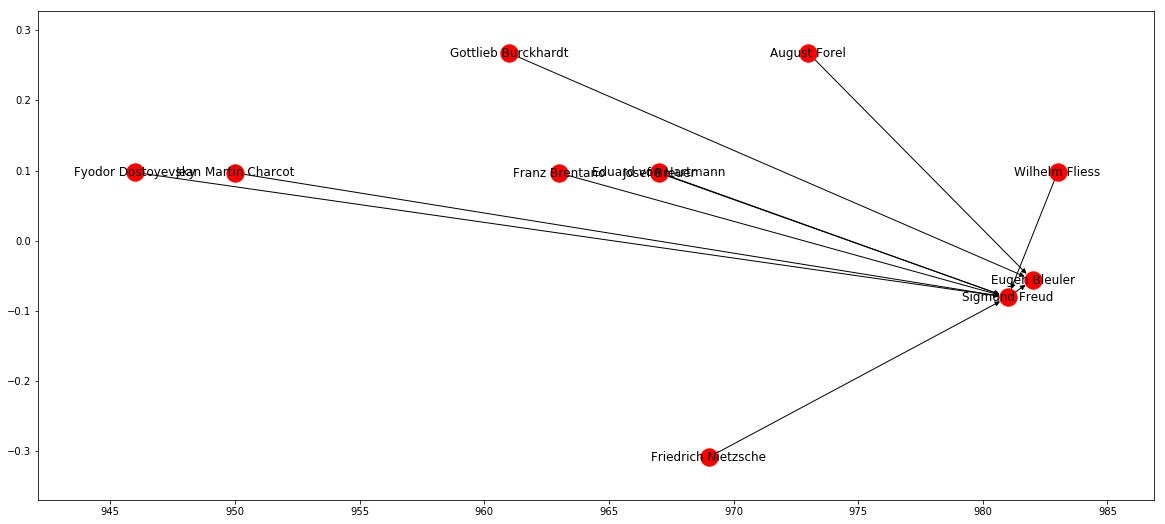

In [82]:

import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

# Let's look at dudes based on their birth range
tuple_list = sorted(pos_dict.items(), key=lambda x: x[1][0])[27:38]
jung_digraph = load_object('jung_digraph')
node_list = [node[0] for node in tuple_list]
jung_subgraph = jung_digraph.subgraph(node_list)
subgraph_fig = plt.figure(figsize=(20, 9))
subgraph_ax = subgraph_fig.add_subplot(111)
nx.draw_networkx(G=jung_subgraph, pos=pos_dict)
print(str(node_list))

In [83]:

cut_array = pd.cut(np.array([-1.5, 1.5]), len(node_list)+1, retbins=True)[1]
for i, node in enumerate(node_list):
    pos_dict[node] = np.array((pos_dict[node][0], cut_array[i+1])).astype(np.float32)
store_objects(pos_dict=pos_dict)

['Carl Jung', 'Hermann Hesse', 'Gaston Bachelard', 'Ross Nichols', 'Joseph Campbell', 'Erich Neumann (psychologist)', 'Alan Watts']


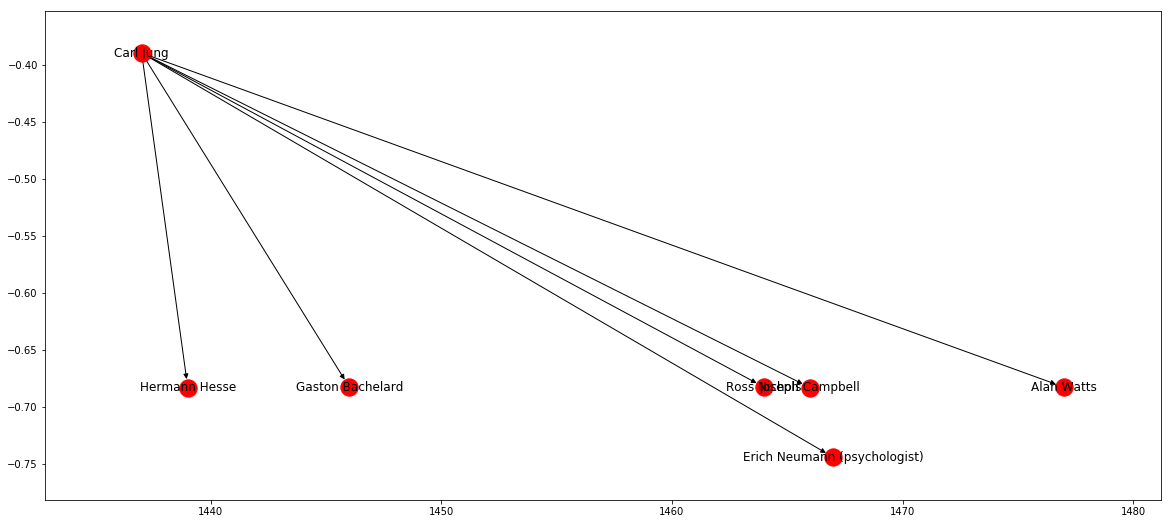

In [87]:

import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

# Let's look at dudes based on their birth range
tuple_list = sorted(pos_dict.items(), key=lambda x: x[1][0])[38:45]
jung_digraph = load_object('jung_digraph')
node_list = [node[0] for node in tuple_list]
jung_subgraph = jung_digraph.subgraph(node_list)
subgraph_fig = plt.figure(figsize=(20, 9))
subgraph_ax = subgraph_fig.add_subplot(111)
nx.draw_networkx(G=jung_subgraph, pos=pos_dict)
print(str(node_list))

In [88]:

cut_array = pd.cut(np.array([-1.5, 1.5]), len(node_list)+1, retbins=True)[1]
for i, node in enumerate(node_list):
    pos_dict[node] = np.array((pos_dict[node][0], cut_array[i+1])).astype(np.float32)
store_objects(pos_dict=pos_dict)

['Terence McKenna', 'Camille Paglia', 'Jordan Peterson']


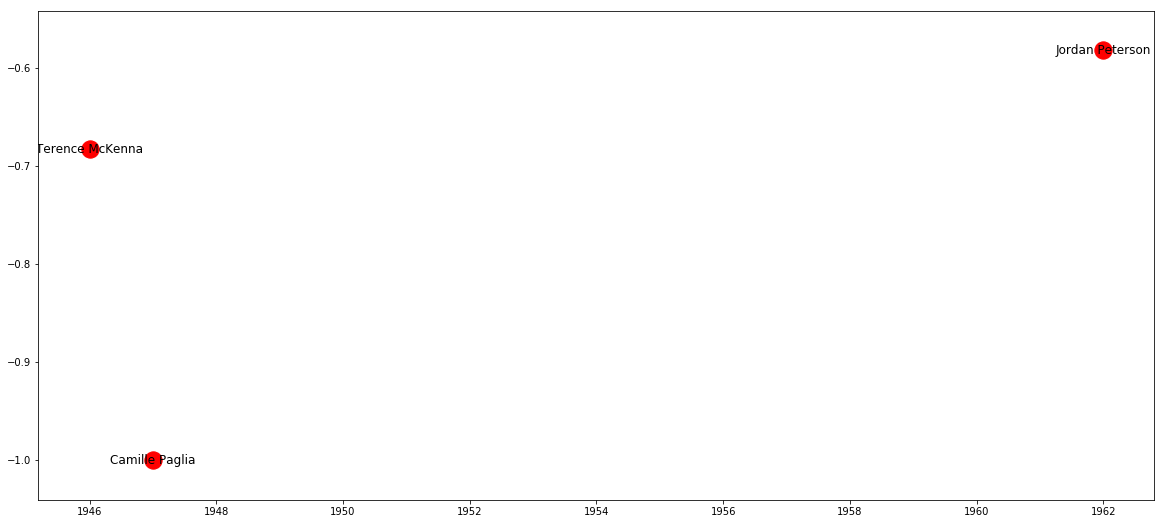

In [90]:

import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

# Let's look at dudes based on their birth range
tuple_list = sorted(pos_dict.items(), key=lambda x: x[1][0])[45:48]
jung_digraph = load_object('jung_digraph')
node_list = [node[0] for node in tuple_list]
jung_subgraph = jung_digraph.subgraph(node_list)
subgraph_fig = plt.figure(figsize=(20, 9))
subgraph_ax = subgraph_fig.add_subplot(111)
nx.draw_networkx(G=jung_subgraph, pos=pos_dict)
print(str(node_list))

In [91]:

cut_array = pd.cut(np.array([-1.5, 1.5]), len(node_list)+1, retbins=True)[1]
for i, node in enumerate(node_list):
    pos_dict[node] = np.array((pos_dict[node][0], cut_array[i+1])).astype(np.float32)
store_objects(pos_dict=pos_dict)

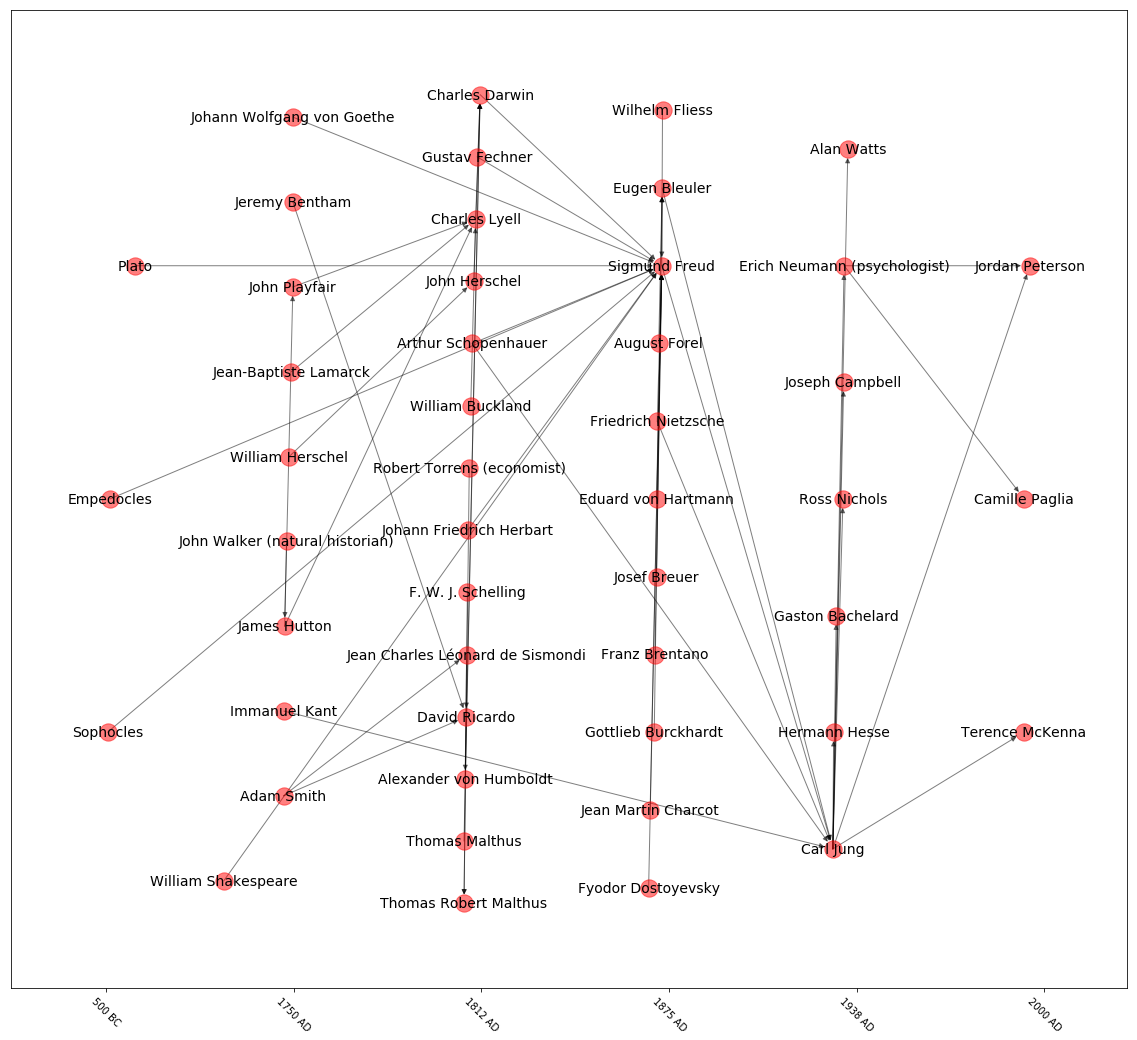

In [98]:

import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

# Draw the graph using the birth-year-based layout
pos_dict = load_object('pos_dict')
jung_fig = plt.figure(figsize=(20, 18))
ax = jung_fig.add_subplot(111)
xticklabel_list = []
bc_regex = re.compile(r'-(\d+)')
for xtick in xtick_list:
    if xtick == 0:
        xticklabel_list.append('')
    elif xtick < 0:
        xticklabel_list.append(bc_regex.sub(r'\1 BC', str(xtick)))
    elif xtick > 0:
        xticklabel_list.append(str(xtick) + ' AD')
plt.xticks(nominal_list, xticklabel_list, rotation=-45)
plt.yticks([], [])
jung_digraph = load_object('jung_digraph')
node_collection = nx.draw_networkx_nodes(G=jung_digraph, pos=pos_dict, alpha=0.5)
edge_collection = nx.draw_networkx_edges(G=jung_digraph, pos=pos_dict, alpha=0.5)
labels_collection = nx.draw_networkx_labels(G=jung_digraph, pos=pos_dict, font_size=14)